# SMILES (Simplified Molecular Input Line Entry System)
<br><br>

> 참고
* 브라운의 유기화학 7th edition
* [Daylight](http://www.daylight.com/dayhtml/doc/theory/theory.smiles.html)
* [RDKit](https://www.rdkit.org/)

`$ conda install -c conda-forge rdkit` <br>
위의 코드를 **anaconda prompt**에 작성 하면 **RDKit** 다운로드 가능

In [1]:
#RDkit 적용
from __future__ import print_function #2.X대 python호환을 위해
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

##  1.Canonicalization (정규화)
* 본질적으로 화학자들이 어떤 분자를 묘사하기위한 평면의 그림. <br>
* 분류한 분자들을 의미하는 SMILE을 `generic SMILE`이라 한다.<br>
*  주어진 구조에 대한 유효한 다양한 SMILES들이 존재한다.<br>
   따라서 모든 SMILE 중 유일한 `unique SMILES` 형성하기위한 알고리즘이 존재한다.   
* 동위원소, 카이랄을 표현하기 위한 SMILES : `isomeric SMILES`
* unique + isomeric SMILES : `absolute SMILES`

In [2]:
m = Chem.MolFromSmiles('OCC')

In [3]:
Chem.MolToSmiles(Chem.MolFromSmiles('OCC'))

'CCO'

In [4]:
Chem.MolToSmiles(Chem.MolFromSmiles('C-C-O'))

'CCO'

In [5]:
Chem.MolToSmiles(Chem.MolFromSmiles('C(O)C'))

'CCO'

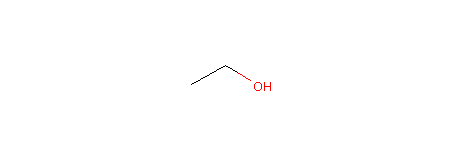

In [6]:
m

위의 Draw function을 import하지 않으면 다음과 같은 화합물의 저장 형식이 <rdkit.Chem.rdchem.Mol object at 0x...>와 같이 나온다.

In [7]:
Chem.MolToMolBlock(m)

'\n     RDKit          \n\n  3  2  0  0  0  0  0  0  0  0999 V2000\n    0.0000    0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n  1  2  1  0\n  2  3  1  0\nM  END\n'

## 2.SMILES Sepcification Rules (SMILES 규칙)
* SMILE는 띄어쓰기를 사용하지 않고 원자들을 일렬로 나열하여 표현한다.
* 수소원자는 생략하거나, 포함해도 된다.
* 방향족 물질들은 직관적으로 명시하거나 `Kekulé form`으로 분류할 수 있다.
* 대표적으로 5가지의 규칙이 있다. ( `원자(atom), 결합(bond), 가지(branch), 고리닫힘(ring closure), 단절(disconnection)` )
### 2.1 Atoms(원자)
* 수소를 포함하지 않는 단일원자는 `[]`사용
* `organic subset`는 `[]` 없이 쓰이기도 한다.
* 최소 원자가 전자를 갖는다고 인식한다. :: B (3), C (4), N (3,5), O (2), P (3,5), S (2,4,6), 할로겐족(1).
* 지방족 탄소는 대문자 'C' 로, 방향족 탄소는 'c'로 명시한다.

In [8]:
methane = Chem.MolFromSmiles('C')

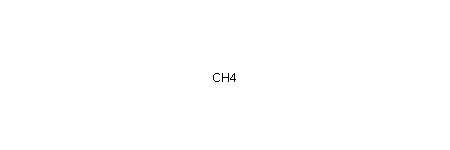

In [9]:
methane # 수소가 생략된다

In [10]:
C = Chem.MolFromSmiles('[C]')

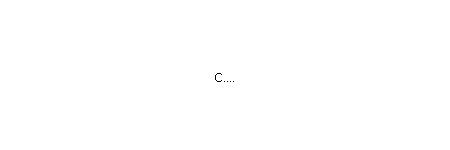

In [11]:
C

* '$[]$'속의 수소와 형식전하는 반드시 명시되어야 한다. 결합된 수소의 수는 *H* 와 숫자로 표현된다.
* 형식전하는 `+` 혹은 `-` 로 표시되어야 한다. 명시되어 있지 않으면 전하는 `0`으로 가정한다.
* $[Fe+++] = [Fe+3]$

### 2.2 Bonds(결합)
* 단일(single; `-`), 이중(double; `=`), 삼중(triple; `#`), 그리고 방향족 결합(aromatic; `:`)으로 표기한다.<br>
단일결합이나 방향족 결합은 거의 항상 생략한다.

In [12]:
ethane = Chem.MolFromSmiles('CC')

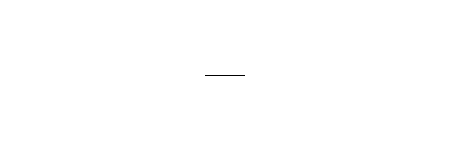

In [13]:
ethane

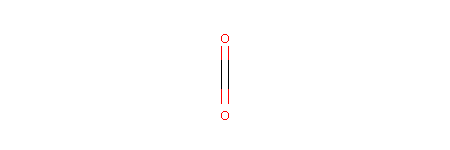

In [14]:
CO2 = Chem.MolFromSmiles('O=C=O')
CO2

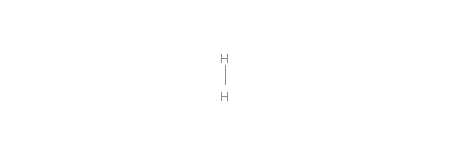

In [15]:
H2 = Chem.MolFromSmiles('[H][H]')
H2

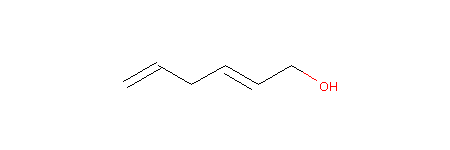

In [16]:
#Ex) 6-hydroxy-1,4-hexadiene
A1 = Chem.MolFromSmiles('C=CCC=CCO')
A1

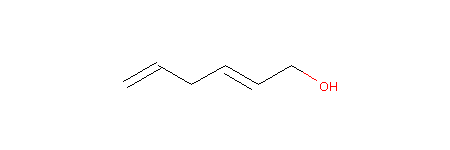

In [17]:
A2 = Chem.MolFromSmiles('C=C-C-C=C-C-O')
A2

###  2.3 Branches(가지; 치환기, 작용기)
* 가지들은 중첩되거나 쌓일 수 있으며, 소괄호`()`로 묶어 결합 원소의 오른쪽에 써준다.

<h3>Triethylamine |<h3> Isobutyric acid |<h3> 3-propyl-4-isopropyl-1-heptene
---- | ---- | ----
![Triethylamine](http://www.daylight.com/dayhtml/doc/theory/theory1.gif) | ![ Isobutyric acid](http://www.daylight.com/dayhtml/doc/theory/theory2.gif) | ![3-propyl-4-isopropyl-1-heptene](http://www.daylight.com/dayhtml/doc/theory/theory3.gif)
<h3>CCN(CC)CC |<h3> CC(C)C(=O)O |<h3> C=CC(CCC)C(C(C)C)CCC <br>
* 위에 언급한 `원자, 결합, 가지`는 모든 SMILE의 기본이 된다.

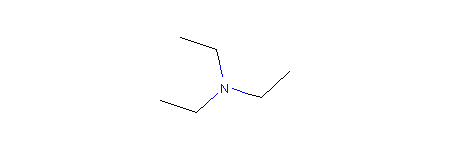

In [18]:
Ttl = Chem.MolFromSmiles('CCN(CC)CC')
Ttl

### 2.4 Cyclic Structures

* 고리형 구조는 고리에서 하나의 결합을 끊어 선형적으로 표시하고, 결합을 끊은 원자 바로 뒤에 숫자를 이용해 고리형 구조를 표현 <br>

> Ex)Cyclohexane <br><br>
![Cyclohexane](http://www.daylight.com/dayhtml/doc/theory/theory4.gif)<br><br>

--------------------
> 동일한 화학물을 여러 방법으로 표현할 수 있다.<br>
 Ex)1-methyl-3-bromo-cyclohexene-1 <br><br>
 ![1-methyl-3-bromo-cyclohexene-1](http://www.daylight.com/dayhtml/doc/theory/theory5.gif)
<center> (a) Br을 가지로 본 경우 , (b) (CC1)을 가지로 본 경우 </center><br><br>

--------------------
* 한 가지의 분자의 다양한 표현은 우선순위가 없다.
* 한 원자는 하나 이상의 `ring closure`을 가질 수 있다. 아래와 같은 큐베인(cubane , $C_{8}H_{8}$)구조로 설명할 수 있다.

> ![Atom with 2ring](http://www.daylight.com/dayhtml/doc/theory/theory6.gif) <br><br>
 큐베인을 SMILES로 표현하면 `C12C3C4C1C5C4C3C25`<br><br>

* 필요하면 숫자를 여러번 사용할 수 있다.(다른 위치의 원자에 한해서)

> 아래 예시는 1을 두 번 사용한 것이다.
![reuse#](http://www.daylight.com/dayhtml/doc/theory/theory7.gif)
<br><br>

>고리 닫힘 숫자의 재사용은 10개 혹은 그 이상의 고리가 있을 경우에 가능하다.<br>
 동시에 10개 이상의 고리 닫힘이 있는 필요한 구조물은 **매우 드물다**.<br>
필요에 의해 고리를 의미하는 숫자 앞에 퍼센트 기호(%)를 추가하여 높은 숫자를 표현할 수 있다.<br>
에를 들어 C2%13%24는 고리 2, 13, 24를 닫은 탄소 원이다.

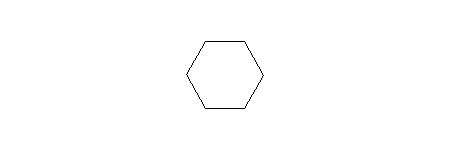

In [19]:
Cyclohexane = Chem.MolFromSmiles('C1CCCCC1')
Cyclohexane

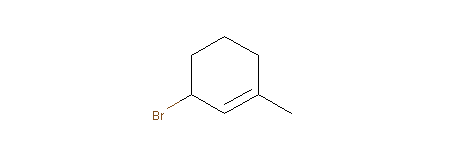

In [20]:
M1 = Chem.MolFromSmiles('CC1=CC(Br)CCC1')
M2 = Chem.MolFromSmiles('CC1=CC(CCC1)Br')
M1

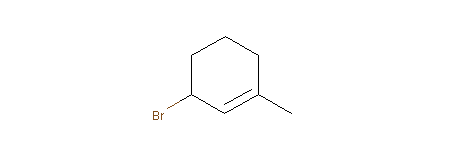

In [21]:
M2

In [22]:
print(Chem.MolToSmiles(M1))
print(Chem.MolToSmiles(M2))

CC1=CC(Br)CCC1
CC1=CC(Br)CCC1


### 2.5 Disconnected Structures
* `disconnected`혼합물은 '.'을 사용하여 각각의 구조들을 분리시킨다.
* `이온` 혹은 `리간드(ligands)`의 연결은 순서에 상관없이 사용가능하다. 한 전하가 다른 전하로의 연결을 의미하는 것도 아니고, 알짜 전하를 반드시 0으로 가질 필요도 없다.
<br><br>
* 필요에 따라, 한 이온의 SMILE이 sodium phenoxide(석탄산나트륨)와 같이 다른 이온에 삽입될 수 있다.<br><br>
![sodium phenoxide](http://www.daylight.com/dayhtml/doc/theory/theory8.gif)
<br><br>
* 원자 명시에 따른 자릿수가 같은 쌍은 서로 결합됨을 의미한다.
* 결합은 명시적(표기가 된;결합 기호 and/or 고리 닫힘 숫자 앞의 기호) 혹은 암묵적(표기가 되지 않은;비방향성 결합 or 방향족의 결합)일 수 있다. 이는 고리의 부분이 결합으로 끝나는지 아닌지를 확인하기 위한 수단이다.
---------
* 점(.)으로 분리된 인접한 원자들은 원자가 서로 결합하지 않는다는 것을 의미한다. 이는 원자가 같은 화합물로 연결되어 있는지를 확인하기 위한 사실이다.<br>
예를 들어, C1.C1 은 CC(ethane)과 같은 분자임을 명시한다.

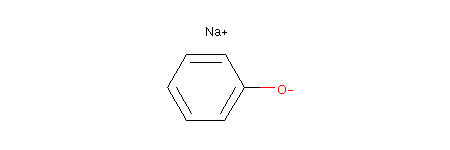

In [23]:
N1 = Chem.MolFromSmiles('[Na+].[O-]c1ccccc1')
N2 = Chem.MolFromSmiles('c1cc([O-].[Na+])ccc1')
N1

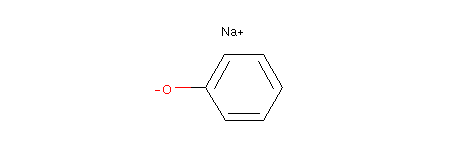

In [24]:
N2

In [25]:
print(Chem.MolToSmiles(ethane))

CC


In [26]:
CdotC = Chem.MolFromSmiles('C1.C1')
print(Chem.MolToSmiles(CdotC))

CC


##  3.Isomeric SMILES(이성질의 SMILE)
* 동위 원소, 이중결합의 구조, 그리고 카이랄성을 추가적으로 규정.
* IUPAC와 CIP에서의 화학적 명명법과는 다르게 설명할 규칙들은 카이랄성의 부분적 명시를 위해 고안되었다.
* 모든 화합물의 카이랄성이 알려져 있지 않기에, 이용 가능한 카이랄성만을 표기한다.
* SMILE에서 모든 이성질체의 명시 규칙은 선택적이다. 특성의 규격이 없다는 것은 해당하는 특성의 값이 지정되지 않았음을 의미한다. 

### 3.1 Isotopic Specification(동위원소)
* 동위원소는 해당되는 원소의 원자를 `[ 원자량+원자기호 ]` 로 표기한다.

SMILES | Name
---- | ----
$[12C]$ | carbon-12
$[13C]$ | carbon-13
$[C]$ | carbon(unspecified mass)
$[13CH4]$ | C-13 methane

### 3.2 Configuration Around Double Bonds(이중결합의 배치)
* 이중결합의 구조 이성질체는 결합의 방향을 나타내며 단일 결합이나, 방향족의 결합으로 간주되는 '/'와'\'로 명시한다.
* '/'와'\'는 결합된 원자들 간의 상대적인 위치를 나타내는 것으로, 이중결합으로 연결될 때에만 의미를 갖는다.<br>
**cf)E,Z체계**<br>
E(entgegon) : 반대편이라는 어원, 높은 우선순위를 갖는 탄소가 포함된 치환기가 이중결합의 **반대 위치**에 존재할 경우(≒trans-)<br>
Z(zusammen) : 함께라는 어원, 높은 우선순위를 갖는 탄소가 포함된 치환기가 이중결합의 **같은 위치**에 존재할 경우(≒cis-)<br>
Ex) E- and Z-1,2-difluoroethene

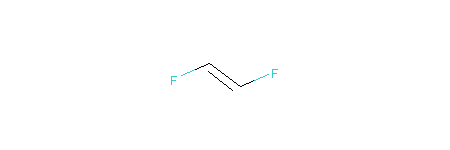

In [27]:
E1 = Chem.MolFromSmiles('F/C=C/F')
E2 = Chem.MolFromSmiles('F/C=C\F')
E1

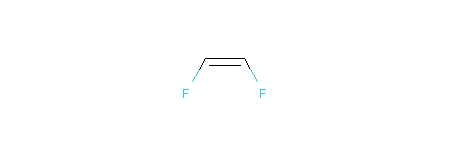

In [28]:
E2

E-1,2-difluoroethene | Z-1,2-difluoroethene
---- | ----
![E](http://www.daylight.com/dayhtml/doc/theory/theory9.gif) | ![Z](http://www.daylight.com/dayhtml/doc/theory/theory10.gif)
F/C=C/F | F/C=C\F
F\C=C\F | F\C=C/F

* SMILE과 CIP같은 다른 카이랄의 표현의 중요한 차이점은 SMILE은 국부적인 카이랄성(local chirlity)을 표현하고(이와 반하는 것은 절대적 카이랄성(absolute chirality)), 국부적 카이랄성은 부분적인 명시만 표현해준다.

completely specified | partially specified
---- | ----
![complete](http://www.daylight.com/dayhtml/doc/theory/theory11.gif) | ![partial](http://www.daylight.com/dayhtml/doc/theory/theory12.gif)
F/C=C/C=C/C | F/C=C/C=CC

In [29]:
S1 = Chem.MolFromSmiles('F/C=C/C=C/C')
S2 = Chem.MolFromSmiles('F/C=C/C=CC')

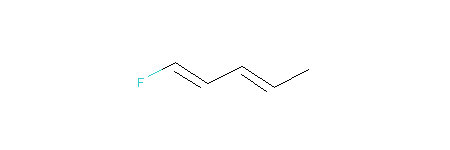

In [30]:
S1

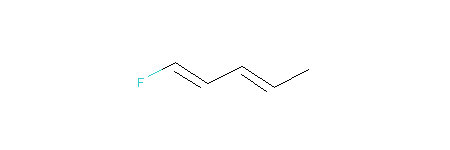

In [31]:
S2

### 3.3 Configuration Around Tetrahedral Centers(사면체의 중심의 구조)
* SMILE은 국부적 카이랄성을 기반으로한 가장 일반적인 형식의 명시법을 사용한다.
* unique smile화 하기 위해 Daylight software는 구조들이 수정되거나 재배열될 때, 카이랄의 명시를 위한 의미를 포함한다.
* SMILE에서 사면체의 중심은 카이랄 원자의 원자 기호에 카이랄이라는 명시(@ 혹은 @@)를 한다.
* cf)**카이랄성(Chirality)**<br>
자신의 거울상에 포갤 수 없는 분자를 **카이랄(chiral)**이라 칭한다.<br>
**같은 분자식이라 하여도 입체구조에 의해 서로 다른 화합물이다.**<br>
카이랄성의 가장 일반적인 **원인은 네 개의 서로다른 치환기가 결합된 탄소에서 가장 많이 볼 수 있는 정사면체**인 원자 때문이다.<br>
네 개의 **서로 다른 치환기체가 결합된** 탄소 원자는 두 개의 주요 대칭 요소가 없고 그래서 **카이랄 중심(chiral center)**라 불린다.<br>
Ex) 1-Bromo-1-chloro-1-fluoromethane : C에 -Cl, -H, -F, -Br이 결합된 카이랄 중심이다.
![chiral](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Chiral.svg/300px-Chiral.svg.png)
(사진출처:위키피디아)

unspecified chirality | specified chirality
---- | ----
![u.c](http://www.daylight.com/dayhtml/doc/theory/theory13.gif) | ![s.c](http://www.daylight.com/dayhtml/doc/theory/theory14.gif)
NC(C)(F)C(=O)O | N$[C@]$(C)(F)C(=O)O(anticlockwise)
NC(F)(C)C(=O)O | N$[C@@]$(F)(C)C(=O)O(clockwise)

* '@'는 이웃하는 원자들이 반시계로 표현되어 있다는 것을 의미하고 '@@'는 이웃하는 원자들이 시계로 표현되어 있다는 것을 의미한다.(시계와 반시계는 카이랄 중심, @@:anti-anti-clockwise)
<br><br>
cf)**카이랄 중심의 R or S 배열 결정**(in Organic chemistry)<br>
1. 카이랄 중심을 정하고 4개의 치환기를 확인한 후, 우선순위가 가장 높은 것(1)부터 가장 낮은 것(4)까지 번호를 배정
> **우선순위**<br>
카이랄 중심에서 결합된 원자의 번호가 클수록 높은 우선순위 -> 비교가 안된다면 두 번째 쌍을 살펴본다 -> 이중 결합의 경우 결합과 같은 수만큼의 '가상'의 원자들이 단일 결합으로 취급
2. 가장 난은 우선순위(4)를 갖는 치환기를 자동차의 운전대 기둥처럼 당신으로 부터 가장 멀리 위치하도록 분자를 배치
3. 당신 쪽으로 향하고 있는 세 개의 치환기들을 우선순위가 가장 높은(1)치환기 부터 우선순위가 가장 낮은(3) 치환기 순서대로 읽어라
4. 치환기가 시계방향으로 읽혀지면 배열을 **R(라틴어 rectus,똑바른, 올바른); SMILE에선 @@**, 반시계 방향이라면 **S(라틴어 sinister, 왼쪽); SMILE에선 @**로 배정 <br>
#### 임의의 원자를 기준으로 카이랄 중심과 그 다음 원자(구조식이 복합한)까지 선형이라 가정후 방향성에 맞춰 카이랄 중심을 기준으로 가지를 붙히는 것으로 표현

In [32]:
m = Chem.MolFromSmiles('N[C@](C)(F)C(=O)O')
m.HasSubstructMatch(Chem.MolFromSmiles('F[C@](N)(C)C(=O)O'),useChirality=True)
# 구조가 같은지의 확인을 위한 함수
# 뒤에 사용된 useChirality를 True로 설정하면 입체 및 카이랄성 일치도 확인

True

In [33]:
m.HasSubstructMatch(Chem.MolFromSmiles('F[C@@](C)(N)C(=O)O'),useChirality=True)

True

In [34]:
m.HasSubstructMatch(Chem.MolFromSmiles('OC(=O)[C@@](N)(C)F'),useChirality=True)

True

In [35]:
Chiral1 = Chem.MolFromSmiles('N[C@](C)(F)C(=O)O')
Chiral2 = Chem.MolFromSmiles('N[C@@](F)(C)C(=O)O')
Chem.MolToSmiles(Chiral1)

'CC(N)(F)C(=O)O'

In [36]:
Chem.MolToSmiles(Chiral2)

'CC(N)(F)C(=O)O'

* 중앙 탄소가 가장 첫 번째 원자가 아니고, 암묵적으로 수소를 부착한 경우(최대 1개의 수소를 가질수 있으며 chiral일 수 있음), 수소는 사면체 구격을 따르는 세 개의 이웃원자의 첫번째 원자로 간주된다.
* 중앙 탄소가 가장 첫 번째 원자이면, 암묵적으로 수소를 취하는"from"원자이다. 각각의 경우, 순서는 정확히 SMILE에 쓰여진 것과 같다.<br>
Alanine의 유효한 SMILE을 보겠다.

![1](http://www.daylight.com/dayhtml/doc/theory/theory15.gif) | ![2](http://www.daylight.com/dayhtml/doc/theory/theory16.gif)
---- | ----
$N[C@@]([H])(C)C(=O)O$ | $N[C@]([H])(C)C(=O)O$
$N[C@@H](C)C(=O)O$ | $N[C@H](C)C(=O)O$
$N[C@H](C(=O)O)C$ | $N[C@@H](C(=O)O)C$
$[H][C@](N)(C)C(=O)O$ | $[H][C@@](N)(C)C(=O)O$
$[C@H](N)(C)C(=O)O$ | $[C@@H](N)(C)C(=O)O$

In [37]:
m = Chem.MolFromSmiles('N[C@]([H])(C)C(=O)O')
m.HasSubstructMatch(Chem.MolFromSmiles('N[C@H](C)C(=O)O'),useChirality=True)

True

In [38]:
m.HasSubstructMatch(Chem.MolFromSmiles('N[C@@H](C(=O)O)C'),useChirality=True)

True

In [39]:
m.HasSubstructMatch(Chem.MolFromSmiles('N[C@H](C(=O)O)C'),useChirality=True)

False

In [40]:
m.HasSubstructMatch(Chem.MolFromSmiles('[H][C@@](N)(C)C(=O)O'),useChirality=True)

True

* 고리닫힘 결합의 카이랄 순서는 고리 닫힘 숫자가 카이랄 원자에서 나타나는 어휘순서로 표현한다("하위"원자의 어휘 순서에서가 아님).
![1](http://www.daylight.com/dayhtml/doc/theory/theory17.gif)
C$[C@H]$1CCCCO1 or O1CCCC$[C@@H]$1C

### 3.4 General Chiral Sepcification(일반적 카이랄 규격)
* 사면체의 구조에서와 달리 많은 종류의 카이랄성이 존재하며, '@'기호를 사용함으로 위와 같은 특별한 경우의 카이랄 규격의 문법을 봤다.
* SMILE에서 사용하는 일반적 카이랄 규격은 3부분이 있다:'@'기호, 잇따르는 두 글자의 카이랄 표시, 그리고 잇따르는 수적인 카이랄 지정자가 있다.
* 가장 기초가 되는 카이랄 class는 각각의 degree(연결의 수); 4개의 연결에 기초가되는 클라스는 사면체(TH)이다.
* 대부분의 경우 @1표시는 SMILE의 순서를 기준으로한 축에 반시계 방향으로 @2표시는 시계방향을 의미한다.
* '@@'와 '@@@'는 '@2'와'@3'으로 해석된다.
* 위에서 사용된 '@'와 '@@'는 '@TH1'과 '@TH2'를 간략하게 표현한 것이다.
* SMILE은 모든 범위에 관한 카이랄 규격을 다룬다.('감소된 카이랄성', '퇴화된 카이랄성') 따라서 정확하게 알고 있는 모든 것을 보장하는 언어이다.
--------
* 이 섹션의 마지막 부분에선 사면체, 알렌식(allen-like), 사각평면, trigonal-bypyramidal, octahedral의 카이랄성에 제한될 것이다. 비록 많은 카이랄성은 위의 체계로 다룰 수 있겠지만, 이러한 5개의 클래스는 화학에서 매우 흔하고, 자주 다뤄지는 부분이다.
![trigonal-bypyramidal](http://www.chemtube3d.com/gallery/inorganicsjpgs/MA5.jpg)
![octahedral](https://www.periodni.com/gallery/octahedral_molecular_geometry.png)

* *Tetrahedral*:TH라는 기호로 표시되며, 4방위가 붙어있는 카이랄 클래스의 default이다.
>1과 2만이 가능하다. @TH1(or @)는 이어지는 3개의 연결된 원자들이 반시계 방향으로 연결된 것이다. @TH2(or @@)는 시계방향이다.

* *Allen-like*:AL의 기호로 표시되며, 카이랄 중심이 이중결합으로 연결된 2개가 붙어있는 카이랄 클래스의 default이다. 비록 C=C=C의 구조가 가장 흔하나, C=C=C=C=C 구조들도 또한 allen-like이다, 이중결합된 원자가 일렬로 짝수개가 연결된 것이다.
>@AL1(or @)과 @AL2(or @)의 값이 가능하다; 이들은 대체된 원자의 중첩과 각각의 사면체의 평가에 의해 해석된다.<br>
대체된 allen-like 원자에 부착된 수소는 그 원자의 바로 뒤에 있는 것으로 간주된다.

![AL](http://www.daylight.com/dayhtml/doc/theory/theory18.gif) | ![substituted](http://www.daylight.com/dayhtml/doc/theory/theory19.gif)
---- | ----
OC(Cl)=$[C@]$=C(C)F | OC=$[C@]$=CF
OC(Cl)=$[C@AL1]$=C(C)F | OC($[H]$)=$[C@AL1]$=C($[H]$)F

In [41]:
m = Chem.MolFromSmiles('OC(Cl)=[C@]=C(C)F')
m.HasSubstructMatch(Chem.MolFromSmiles('OC(Cl)=[C@@]=C(F)C'),useChirality=True)

True

* *Square-planar*:SP 기호로 표시한다.
>@SP1,@SP2, @SP3; 4방위가 연결된 카이랄 class의 default는 아니고, 줄이는 표현 또한 없다. 또한 시계와 반시계방향이 없는 점에 대해 다소 생소하다.

![SP](http://www.daylight.com/dayhtml/doc/theory/theory20.gif) | -
---- | ----
F$[Po@SP1]$(Cl)(Br)I | (SP1 lists in a "U shape")
F$[Po@SP2]$(Br)(Cl)I | (SP2 lists in a "4-shape")
F$[Po@SP3]$(Cl)(I)Br | (SP3 lists in a "Z shape")

* *Trigonal-bipyramidal*:TB기호로 사용한다. 5개의 방향의 카이랄 class의 default이다.
>가능한 값은 @TB1~@TB2 : @TB1(or @)는 한 개의 축으로 부터 다른 축까지 SMILE에 의해 나열될 때, 3개의 중간, 수평적으로(equatorially) 연결된 원자들을 반시계 방향으로 나열시킨 것. @TB2(or @@)는 시계 방향

![TB](http://www.daylight.com/dayhtml/doc/theory/theory21.gif)
S$[As@@]$(F)(Cl)(Br)C=O<br>
O=C$[As@]$(F)(Cl)(Br)S<br>

In [42]:
m = Chem.MolFromSmiles('S[As@@](F)(Cl)(Br)C=O')
m.HasSubstructMatch(Chem.MolFromSmiles('O=C[As@](Cl)(Br)(F)S'),useChirality=True)

True

In [43]:
m.HasSubstructMatch(Chem.MolFromSmiles('O=C[As@](F)(Cl)(Br)S'),useChirality=True)

True

* *Octahedral* : OH기호로 사용. 6개의 방향의 카이랄 class의 default이다.
>가능한 값은 @OH1~ @OH2 : @OH1(or @)는 한 개의 축이 다른 것과 연결을 SMILE에 의해 나열될 때, 4개의 중간, 수평적으로 연결된 원자들을 시계방향으로 나열시킨 것.;@OH2(or @@)는 시계방향

![OH](http://www.daylight.com/dayhtml/doc/theory/theory22.gif)
S$[Co@@]$(F)(Cl)(Br)(I)C=O<br>
O=C$[Co@]$(F)(Cl)(Br)(I)S

## 4. SMILES Conventions (관례)

### 4.1 Hydrogens

수소 원자는 대부분의 유기 구조에서 생략된다.
일반적으로 3가지 방법으로 수소 원자를 표시한다.
 - 암시적 표시 : '[',     ']' 으로 표시되지 않은 원자가 원소들
 - 명확한 표시 : '[',     ']' 안에 정확한 갯수와 함께 표시
 - 하나의 수소 원자 : [H]
 
그리고 반드시 수소원자를 명확히 표시해야할 때가 있다.
 - 전하를 띄는 수소 : [H+]
 - 수소 분자 : [H][H]
 - 하나 이상의 다른 원자에 연결된 수소 : bridging hydrogens
 - 동위원소 수소  : heavy water [2H]O[2H]

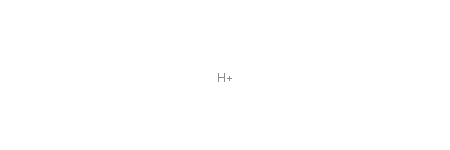

In [44]:
m = Chem.MolFromSmiles('[H+]')
m

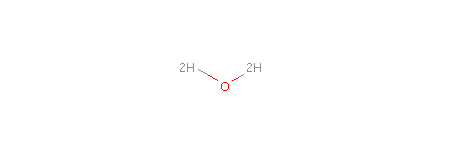

In [45]:
heavywater = Chem.MolFromSmiles('[2H]O[2H]')
heavywater

### 4.2 Aromaticity (방향족)

- 분자의 대칭성을 특징짓기 위해서 SMILES 같은 시스템에서 명확한 명명법을 생성할 수 있어야한다. <br>
- 정확한 방향족 판단 알고리즘이 있는 경우에, 사용자가 지방족 구조를 입력하고 싶을때 방향족 구조식으로 입력할 필요가 없다.<br>
- 원하는 화합물을 짧게 명시할 수 있다.

SMILES은 Hueckel 규칙의 확장 된 버전을 사용하여 방향족 분자와 이온을 식별한다.

> Hueckel's Rule
> 1. 분자는 고리를 가져야한다.
> 2. 고리의 모든 원자는 같은 평면에 있어야한다.
> 3. 고리의 모든 원자는 **fully conjugated** 이어야한다.(모든 원자가 p 오비탈을 가진다.)
> 4. 분자는 (4n+2)개의 $\pi$ 전자를 가진다. ( n은 0 보다 크거나 같은 정수 ) <br>
4번만 만족하지 않는 화합물을 **antiaromatic** 이라고 한다.



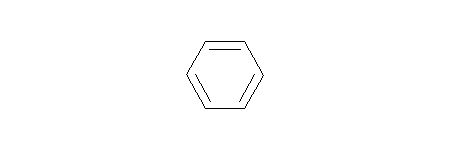

In [46]:
H = Chem.MolFromSmiles('c1ccccc1') # Aromatic
H

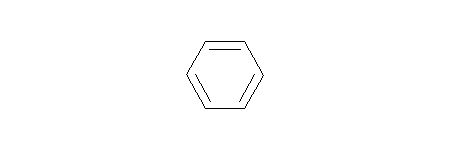

In [69]:
K = Chem.MolFromSmiles('C1=CC=CC=C1') # Aliphatic
K

특히, c1ccc1 (탄소 4개)와 c1ccccccc1 (탄소 8개)의 입력은 C1=CC=C1 및 C1=CC=CC=CC=CC=C1에 대한 정확한 *anti-aromatic* 구조를 생성할 것이다. 그러한 경우 SMILES 시스템은 내재된 sp2 혼합, 내재된 수소 수 및 지정된 공식 전하가 있는 경우 보존되는 구조를 찾는다.<br>
그러나 c1cccc1과 같은 일부 입력은 부정확할 뿐만 아니라 불가능할 수도 있다. 여기서 c1cccc1은 C1=CCC=C1로 변환할 수 없다. 왜냐하면 탄소 원자 중 하나는 두 개의 히드로겐이 부착된 sp3이기 때문이다.<br>
그러한 구조물에서는 단일 및 이중 결합을 번갈아 배치할 수 없기 때문에 SMILES은 "**Impossible**"으로 표시할 것이다.<br>

다음 목록에 있는 원자만 방향족으로 고려할 수 있다 : C, N, O, P, S, As, Se 및 *wildcard*.

![a](http://www.daylight.com/dayhtml/doc/theory/theory27.gif)|![b](http://www.daylight.com/dayhtml/doc/theory/theory28.gif)|![c](http://www.daylight.com/dayhtml/doc/theory/theory29.gif)
----|----|----
C1=COC=C1|C1=CN=C[NH]C(=O)1|C1=C*=CC=C1
c1cocc1|c1cnc[nH]c(=O)1|c1c*ccc1


### 4.3 Aromatic Nitrogen Compounds

방향성 질소는 모두 방향성 질소 기호 n으로 지정할 수 있다. 
 - 피리딘 (Pyridine)
 - 피리딘-N-산화물 (Pyridine-N-oxide)
 - 피롤 (Methyl and 1H-pyrrole)

![a](http://www.daylight.com/dayhtml/doc/theory/theory23.gif)|![b](http://www.daylight.com/dayhtml/doc/theory/theory24.gif)|![c](http://www.daylight.com/dayhtml/doc/theory/theory25.gif)
----|----|----
n1ccccc1 | O=n1ccccc1 _ _ [O-][n+]1ccccc1	 |  Cn1cccc1 _ _ _ [nH]1cccc1
Pyridine | Pyridine-N-oxide	 | Methyl and 1H-pyrrole

> 1-1H-pyrrole의 질소는 pyridyl-N와 구별하기 위해 [nH]로 쓰여져 있다.

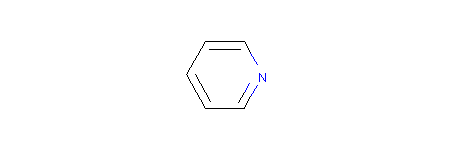

In [53]:
N = Chem.MolFromSmiles('n1ccccc1')
N

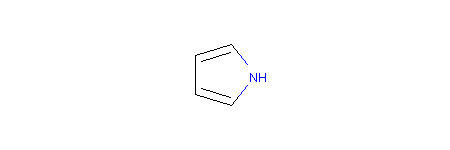

In [76]:
N2 = Chem.MolFromSmiles('[nH]1cccc1')
N2

### 4.4 Bonding Conventions

SMILES의 장점 : 동일한 구조를 다양한 모델로 설명, 분자속 어떤 원자의 전하도 나타낼 수 있다.
> 니트로메탄(Nitromethane) : `CN(=O)=O`    또는   `C[N+](=O)[O-]`

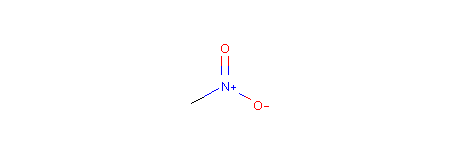

In [58]:
N3 = Chem.MolFromSmiles('CN(=O)=O')
N3

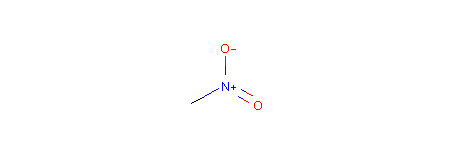

In [62]:
N4 = Chem.MolFromSmiles('C[N+](=O)[O-]')
N4

### 4.5 Tautomers (호변 이성체)

![a](http://www.daylight.com/dayhtml/doc/theory/theory26.gif)|-
-----------|-----------
O=c1[nH]cccc1 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ | Oc1ncccc1
2-pyridone _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ | 2-pyridinol

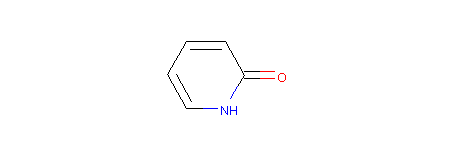

In [63]:
T1 = Chem.MolFromSmiles('O=c1[nH]cccc1')
T1

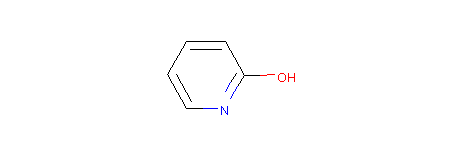

In [66]:
T2 = Chem.MolFromSmiles('Oc1ncccc1')
T2